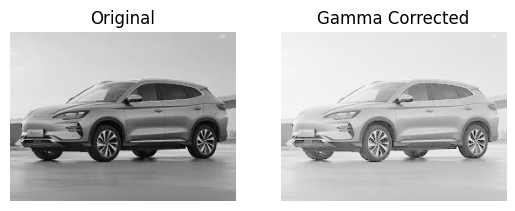

Saved: gamma_output.jpg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/opencv/download.jpeg'

def gamma_correction(c, gamma, I_in):
    I_norm = I_in.astype('float32') / 255
    output = c * (I_norm ** gamma)
    return output

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and file existence.")
else:
    result = gamma_correction(c=1, gamma=0.4, I_in=img)

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title('Gamma Corrected')
    plt.axis('off')

    plt.show()

    result_uint8 = (result * 255).astype('uint8')
    cv2.imwrite('gamma_output.jpg', result_uint8)
    print("Saved: gamma_output.jpg")


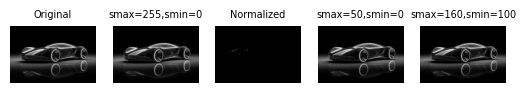

Saved: contrast_output.jpg


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/opencv/download (1).jpeg'

def contrast_stretching(i_in, smax, smin):
    img = i_in.astype('float32')
    rmin = img.min()
    rmax = img.max()
    output = ((smax - smin) / (rmax - rmin)) * (img - rmin) + smin
    output = np.clip(output, 0, 255)
    return output.astype('uint8')

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

result1 = contrast_stretching(img, smax=255, smin=0)

img_norm = img.astype('float32') / 255.0
result2 = contrast_stretching(img_norm, smax=1, smin=0)
result2 = (result2.astype('float32') * 255).astype('uint8')

result3 = contrast_stretching(img, smax=50, smin=0)
result4 = contrast_stretching(img, smax=160, smin=100)

images = [img, result1, result2, result3, result4]
titles = ['Original', 'smax=255,smin=0', 'Normalized', 'smax=50,smin=0', 'smax=160,smin=100']

for i, (im, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 5, i+1)
    plt.imshow(im, cmap='gray')
    plt.title(title, fontsize=7)
    plt.axis('off')

plt.show()

cv2.imwrite('contrast_output.jpg', result1)
print("Saved: contrast_output.jpg")